# Loan Prediction (AnalyticsVidhya)

### Problem Statement

**About Company**

Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customer first apply for home loan after that company validates the customer eligibility for loan.

**Problem**

Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers. Here they have provided a partial data set.

**Data:**

 Variable        |   Description
  -------------  | -------------
    Loan_ID      |    Unique Loan ID
    Gender       |     Male/ Female
    Married      |    Applicant married (Y/N)
	Dependents   |    Number of dependents
    Education    |    Applicant Education (Graduate/ Under Graduate)
   Self_Employed |    Self employed (Y/N)
 ApplicantIncome |    Applicant income
CoapplicantIncome |    Coapplicant income
	LoanAmount	 |    Loan amount in thousands
Loan_Amount_Term |    Term of loan in months
Credit_History   |    Credit history meets guidelines
Property_Area    |    Urban/ Semi Urban/ Rural
    Loan_Status  |    Loan approved (Y/N) 

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cross_validation import train_test_split
from sklearn.model_selection import cross_val_score,KFold
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.preprocessing import RobustScaler
from sklearn.metrics import accuracy_score

import random
random.seed(23)

C:\Users\Admin\Anaconda2\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### Read Data

In [2]:
df = pd.read_csv("train_u6lujuX_CVtuZ9i.csv")
# df.head()

### EDA

In [3]:
df.shape

(614, 13)

In [4]:
df.columns.values

array(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome',
       'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
       'Loan_Status'], dtype=object)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [6]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
cat_cols = ['Gender', 'Married','Education','Self_Employed','Property_Area','Credit_History','Dependents']
num_cols =['Loan_ID','ApplicantIncome', 'CoapplicantIncome','LoanAmount', 'Loan_Amount_Term'] 
# target = ['Loan_Status']
df[cat_cols].head(10)

,Gender,Married,Education,Self_Employed,Property_Area,Credit_History,Dependents
0,Male,No,Graduate,No,Urban,1.0,0
1,Male,Yes,Graduate,No,Rural,1.0,1
2,Male,Yes,Graduate,Yes,Urban,1.0,0
3,Male,Yes,Not Graduate,No,Urban,1.0,0
4,Male,No,Graduate,No,Urban,1.0,0
5,Male,Yes,Graduate,Yes,Urban,1.0,2
6,Male,Yes,Not Graduate,No,Urban,1.0,0
7,Male,Yes,Graduate,No,Semiurban,0.0,3+
8,Male,Yes,Graduate,No,Urban,1.0,2
9,Male,Yes,Graduate,No,Semiurban,1.0,1


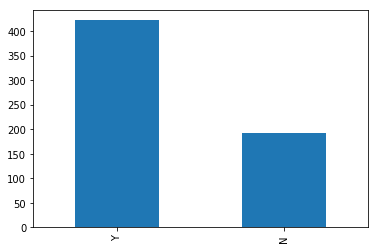

In [8]:
df['Loan_Status'].value_counts().plot(kind='bar');

In [9]:
print('Y% : {}'.format(df['Loan_Status'].value_counts()[0]/float(df.shape[0])))
print('N% : {}'.format(df['Loan_Status'].value_counts()[1]/float(df.shape[0])))

Y% : 0.687296416938
N% : 0.312703583062


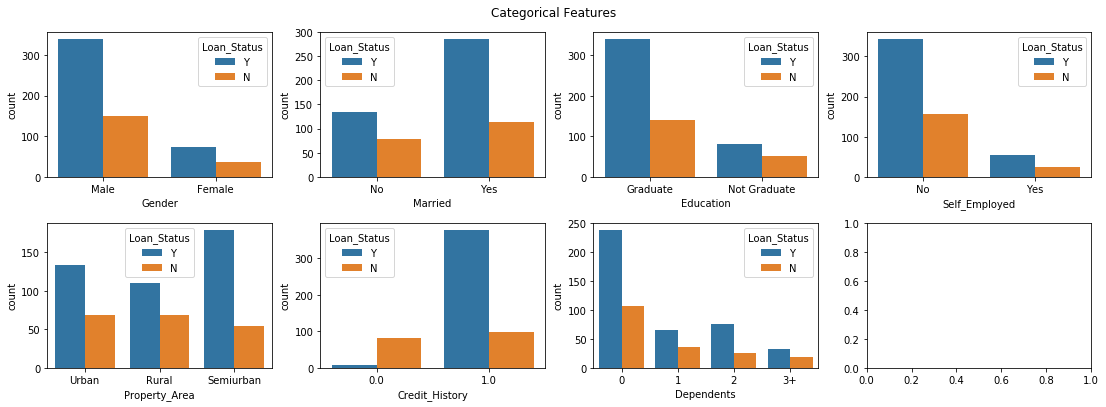

In [10]:
fig, ax = plt.subplots(2,4)
fig.set_size_inches(16,6)
fig.suptitle('Categorical Features')
for i in range(len(cat_cols)):
    row,col = int(i/4), i%4
    sns.countplot(x=cat_cols[i], hue="Loan_Status", data=df, ax=ax[row,col])
#     ax[row,col].set_title(cat_cols[i])

plt.tight_layout(pad=3.0, w_pad=0.5, h_pad=1.0)
plt.show()

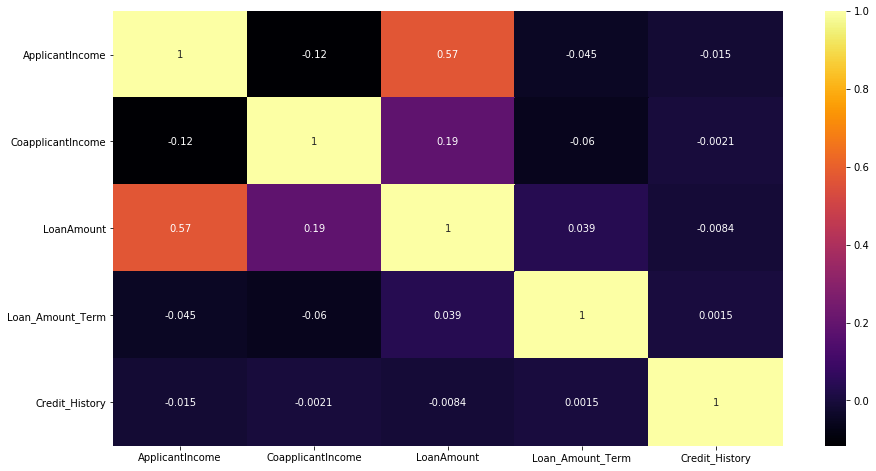

In [11]:
#correlation matrix
cm = df.corr()
plt.figure(figsize=(15,8))
sns.heatmap(cm, annot=True, cmap = 'inferno');

### Feature Engineering

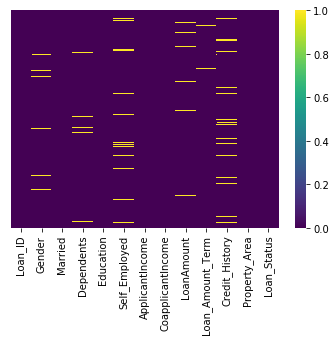

In [12]:
#checking missing values
sns.heatmap(df.isnull(),cmap='viridis',yticklabels=False);

In [13]:
df1 = df.copy()

In [14]:
#Handling missing values
#Imputing categorical features with mode
#numerical features with mean

df1.Gender.fillna(1.0,inplace=True)
df1.Married.fillna(1.0,inplace=True)
df1.Dependents.fillna(0,inplace=True)
df1.Self_Employed.fillna(0,inplace=True)
df1.LoanAmount.fillna(df1.LoanAmount.mean(),inplace=True)
df1.Credit_History.fillna(1.0,inplace=True)
df1.Loan_Amount_Term.fillna(df1.Loan_Amount_Term.mean(),inplace=True)

In [15]:
#Encoding
df1['Gender'].replace({'Male':1,'Female':0},inplace=True)
df1['Married'].replace({'No':0,'Yes':1},inplace=True)
df1['Education'].replace({'Graduate':1,'Not Graduate':0},inplace=True)
df1['Self_Employed'].replace({'No':0,'Yes':1},inplace=True)
df1.Loan_Status.replace({'N':0,'Y':1},inplace=True)
df1['Dependents'].replace({"3+":3},inplace=True,axis=1)

df1['Rural_Property_Area'] = (df1['Property_Area']=='Rural').astype('int')
df1['Semiurban_Property_Area'] = (df1['Property_Area']=='Semiurban').astype('int')
df1['Urban_Property_Area']= (df1['Property_Area']=='Urban').astype('int')

df1['Dep_0'] = (df1['Dependents']=='0').astype('int')
df1['Dep_1'] = (df1['Dependents']=='1').astype('int')
df1['Dep_2']= (df1['Dependents']=='2').astype('int')
df1['Dep_3+']= (df1['Dependents']==3).astype('int')

df1.drop(['Dependents','Property_Area'],axis=1,inplace=True)
df1.head(10)

C:\Users\Admin\Anaconda2\lib\site-packages\pandas\core\generic.py:3786: UserWarning: the "axis" argument is deprecated and will be removed inv0.13; this argument has no effect
  warn('the "axis" argument is deprecated and will be removed in'


,Loan_ID,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Rural_Property_Area,Semiurban_Property_Area,Urban_Property_Area,Dep_0,Dep_1,Dep_2,Dep_3+
0,LP001002,1.0,0.0,1,0,5849,0.0,146.412162,360.0,1.0,1,0,0,1,1,0,0,0
1,LP001003,1.0,1.0,1,0,4583,1508.0,128.000000,360.0,1.0,0,1,0,0,0,1,0,0
2,LP001005,1.0,1.0,1,1,3000,0.0,66.000000,360.0,1.0,1,0,0,1,1,0,0,0
3,LP001006,1.0,1.0,0,0,2583,2358.0,120.000000,360.0,1.0,1,0,0,1,1,0,0,0
4,LP001008,1.0,0.0,1,0,6000,0.0,141.000000,360.0,1.0,1,0,0,1,1,0,0,0
5,LP001011,1.0,1.0,1,1,5417,4196.0,267.000000,360.0,1.0,1,0,0,1,0,0,1,0
6,LP001013,1.0,1.0,0,0,2333,1516.0,95.000000,360.0,1.0,1,0,0,1,1,0,0,0
7,LP001014,1.0,1.0,1,0,3036,2504.0,158.000000,360.0,0.0,0,0,1,0,0,0,0,1
8,LP001018,1.0,1.0,1,0,4006,1526.0,168.000000,360.0,1.0,1,0,0,1,0,0,1,0
9,LP001020,1.0,1.0,1,0,12841,10968.0,349.000000,360.0,1.0,0,0,1,0,0,1,0,0


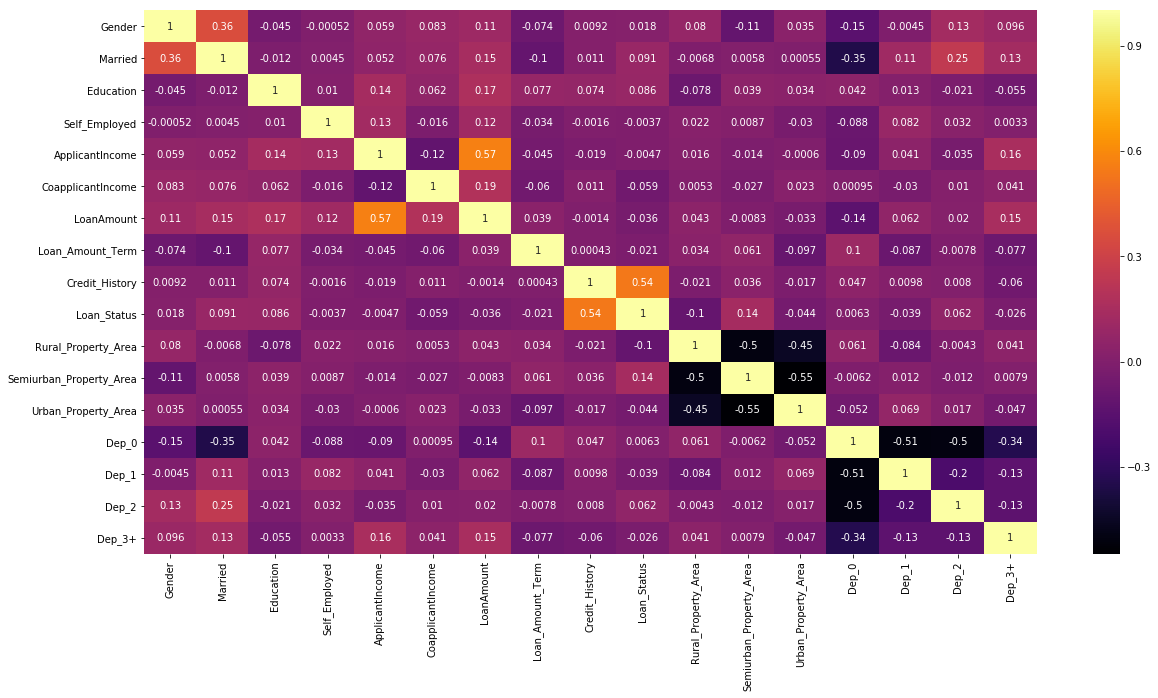

In [16]:
#correlation matrix
cm = df1.corr()
plt.figure(figsize=(20,10))
sns.heatmap(cm, annot=True, cmap = 'inferno');

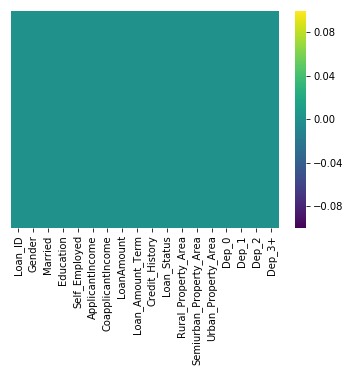

In [17]:
sns.heatmap(df1.isnull(),cmap='viridis',yticklabels=False); #confirming no missing values

In [18]:
#Scaling
to_scale = ['ApplicantIncome','CoapplicantIncome','LoanAmount']
scaler= RobustScaler()
df1[to_scale] = scaler.fit_transform(df1[to_scale])
# df1.head()

In [19]:
# # Removing Features 
df1.drop('Loan_ID',axis=1,inplace=True) #Does not imply any information

### Model Training

In [20]:
X = df1.drop('Loan_Status',axis=1)
y = df1['Loan_Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
X_train1, X_val, y_train1, y_val = train_test_split(X_train,y_train, test_size=0.10, random_state=42) #One Fold Cross Validation

In [21]:
#Applying KFold to guage which algorithm performs better
seed = 7
scoring = 'accuracy'
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('RF', RandomForestClassifier()))
models.append(('DT', DecisionTreeClassifier()))


# evaluate each model in turn
results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f" % (name, cv_results.mean())
    print(msg)

LR: 0.814776
RF: 0.765918
DT: 0.721020


In [22]:
#Logistic Regression    
LR=LogisticRegression()
LR.fit(X_train1,y_train1)
y_pred_val = LR.predict(X_val)
print ('Accuracy on validation set(LR): {}'.format(accuracy_score(y_pred_val,y_val))) #Accuracy on validation set

LR.fit(X_train,y_train)
y_pred_test = LR.predict(X_test)
print ('Accuracy on test set of training data(LR): {}'.format(accuracy_score(y_pred_test,y_test))) #Accuracy on test set of training data

Accuracy on validation set(LR): 0.86
Accuracy on test set of training data(LR): 0.788617886179


In [23]:
#Random Forest

clf = RandomForestClassifier()
params = {'n_estimators': [10,50,100], 
              'criterion': ['entropy', 'gini'],
              'max_depth': [2,4,6,8,16], 
              'min_samples_split': [2, 3, 5, 10, 15,20,25,30,35],
              'min_samples_leaf': [1,3,5,8,50,100]
             }
grid = GridSearchCV(clf,params)
grid.fit(X_train1,y_train1)
y_pred_val = grid.predict(X_val)
print ('Accuracy on validation set(RF): {}'.format(accuracy_score(y_pred_val,y_val))) #Accuracy on validation set

grid.fit(X_train,y_train)
y_pred_test = grid.predict(X_test)
print ('Accuracy on test set of training data(RF): {}'.format(accuracy_score(y_pred_test,y_test))) #Accuracy on test set of training data

Accuracy on validation set(RF): 0.86
Accuracy on test set of training data(RF): 0.788617886179


In [24]:
grid.best_params_

{'criterion': 'entropy',
 'max_depth': 6,
 'min_samples_leaf': 3,
 'min_samples_split': 20,
 'n_estimators': 10}

In [25]:
#XgBoost
X = df1.drop('Loan_Status',axis=1)
y = df1['Loan_Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
X_train1, X_val, y_train1, y_val = train_test_split(X_train,y_train, test_size=0.10, random_state=42)

xgb = XGBClassifier()
xgb.fit(X_train1, y_train1)
y_pred_val = xgb.predict(X_val)
print ('Accuracy on validation set(xgb): {}'.format(accuracy_score(y_pred_val,y_val)))

xgb.fit(X_train,y_train)
y_pred_test = xgb.predict(X_test)
print ('Accuracy on test set of training data(xgb): {}'.format(accuracy_score(y_pred_test,y_test)))


Accuracy on validation set(xgb): 0.84
Accuracy on test set of training data(xgb): 0.772357723577


***

### Testing

In [26]:
df2 = pd.read_csv('test_Y3wMUE5_7gLdaTN.csv')
# df2.head()
# df2.shape

In [27]:
#Imputation
df2.Gender.fillna(1.0,inplace=True)
df2.Dependents.fillna(0,inplace=True)
df2.Self_Employed.fillna(0,inplace=True)
df2.LoanAmount.fillna(df2.LoanAmount.mean(),inplace=True)
df2.Credit_History.fillna(1.0,inplace=True)
df2.Loan_Amount_Term.fillna(df2.Loan_Amount_Term.mean(),inplace=True)
df2.Married.fillna(1.0,inplace=True)

#Encoding
df2['Gender'].replace({'Male':1,'Female':0},inplace=True)
df2['Married'].replace({'No':0,'Yes':1},inplace=True)
df2['Education'].replace({'Graduate':1,'Not Graduate':0},inplace=True)
df2['Self_Employed'].replace({'No':0,'Yes':1},inplace=True)
df2['Dependents'].replace({"3+":3},inplace=True,axis=1)

df2['Rural_Property_Area'] = (df2['Property_Area']=='Rural').astype('int')
df2['Semiurban_Property_Area'] = (df2['Property_Area']=='Semiurban').astype('int')
df2['Urban_Property_Area']= (df2['Property_Area']=='Urban').astype('int')
df2['Dep_0'] = (df2['Dependents']=="0").astype('int')
df2['Dep_1'] = (df2['Dependents']=="1").astype('int')
df2['Dep_2']= (df2['Dependents']=="2").astype('int')
df2['Dep_3+']= (df2['Dependents']==3).astype('int')

df2.drop(['Dependents','Property_Area'],axis=1,inplace=True)

#Scaling
df2[to_scale] = scaler.fit_transform(df2[to_scale])
df2.drop('Loan_ID',axis=1,inplace=True)
# df2.drop('CoapplicantIncome',axis=1,inplace=True)

In [28]:
#Logistic Regression
y_pred_LR = LR.predict(df2)
y_pred_LR = pd.DataFrame(y_pred_LR)
y_pred_LR.replace({1:"Y",0:'N'},inplace=True)
y_pred_LR.to_csv('submit1.csv')
#Score - 0.7847222222222222.

In [29]:
#Random Forest
y_pred = grid.predict(df2)
y_pred = pd.DataFrame(y_pred)
y_pred.replace({1:"Y",0:'N'},inplace=True)
y_pred.to_csv('submit2.csv')
#Score - 0.7638888888888888.

In [30]:
#XgBoost Basic
y_pred_xgb = xgb.predict(df2)
y_pred_xgb = pd.DataFrame(y_pred_xgb)
y_pred_xgb.replace({1:"Y",0:'N'},inplace=True)
y_pred_xgb.to_csv('submit3.csv')
#Score - 0.7916666666666666.
#Rank - 800th out of 2802